In [32]:
# Core Libraries
import pdfplumber
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tiktoken


In [44]:
# Consistent Colors for Sessions
colors = {
    "Session 3": "blue",
    "Session 4": "orange",
    "Session 11": "green",
    "Session 24": "red"
}

In [45]:
def extract_text_stats(path):
    """
    Extracts text statistics from each page:
    - word count
    - sentence count
    - avg words per sentence
    - empty page detection
    - preview snippet for chunking
    """
    rows = []

    with pdfplumber.open(path) as pdf:
        for i, page in enumerate(pdf.pages):
            text = page.extract_text() or ""
            words = text.split()
            sentences = re.split(r"[.!?]", text)

            rows.append({
                "page": i+1,
                "word_count": len(words),
                "sentence_count": len(sentences),
                "avg_words_per_sentence": round(len(words)/(len(sentences)+1), 2),
                "is_empty_page": len(words) < 5,
                "preview_text": text[:300]  # stored for chunking
            })
            
    return pd.DataFrame(rows)


In [46]:
def extract_image_stats(path):
    """
    Counts number of images per page using pdfplumber.
    Helps identify pages where extraction will fail for RAG.
    """
    rows = []
    with pdfplumber.open(path) as pdf:
        for i, page in enumerate(pdf.pages):
            rows.append({
                "page": i+1,
                "num_images": len(page.images)
            })
    return pd.DataFrame(rows)

In [47]:
# File paths
paths = {
    "Session 3": "../courses/IAI/IAI F2025 Session 3 - Machine Learning - Supervised Methods.pdf",
    "Session 4": "../courses/IAI/IAI F2025 Session 4 - Machine Learning -  Unsupervised Methods.pdf",
    "Session 11": "../courses/IAI/IAI F2025 Session 11 - Intro to Natural Language Processing.pdf",
    "Session 24": "../courses/IAI/IAI F2025 Session 24 - Futures of AI.pdf"
}

text_dfs = {}
img_dfs = {}

for session, path in paths.items():
    text_dfs[session] = extract_text_stats(path)
    img_dfs[session] = extract_image_stats(path)


Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P2' is an invalid float value
Cannot set gray non-stroke color because /'P3' is an invalid float value
Cannot set gray non-stroke color because /'P4' is an invalid float value
Cannot set gray non-stroke color because /'P5' is an invalid float value
Cannot set gray non-stroke color because /'P6' is an invalid float value
Cannot set gray non-stroke color because /'P7' is an invalid float value
Cannot set gray non-stroke color because /'P8' is an invalid float value
Cannot set gray non-stroke color because /'P9' is an invalid float value
Cannot set gray non-stroke color because /'P10' is an invalid float value
Cannot set gray non-stroke color because /'P11' is an invalid float value
Cannot set gray non-stroke color because /'P12' is an invalid float value
Cannot set gray non-stroke color because /'P13' 

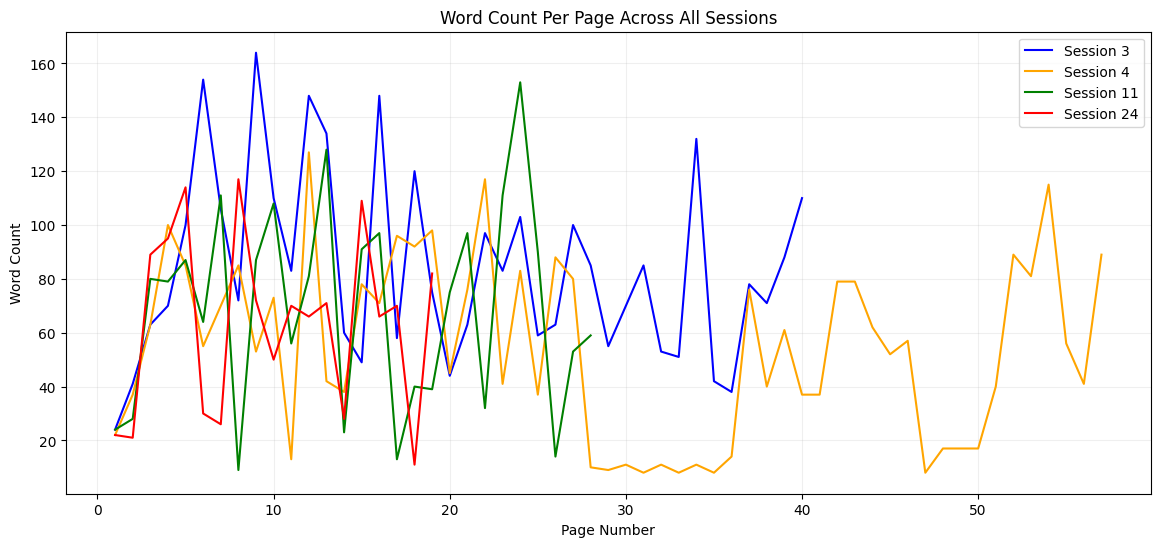

In [49]:
plt.figure(figsize=(14,6))
for session, df in text_dfs.items():
    plt.plot(df["page"], df["word_count"], label=session, color=colors[session])

plt.title("Word Count Per Page Across All Sessions")
plt.xlabel("Page Number")
plt.ylabel("Word Count")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()


/var/folders/ct/wxc91b4n15q2z9c6hq_0m1c00000gn/T/ipykernel_1135/2846264563.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


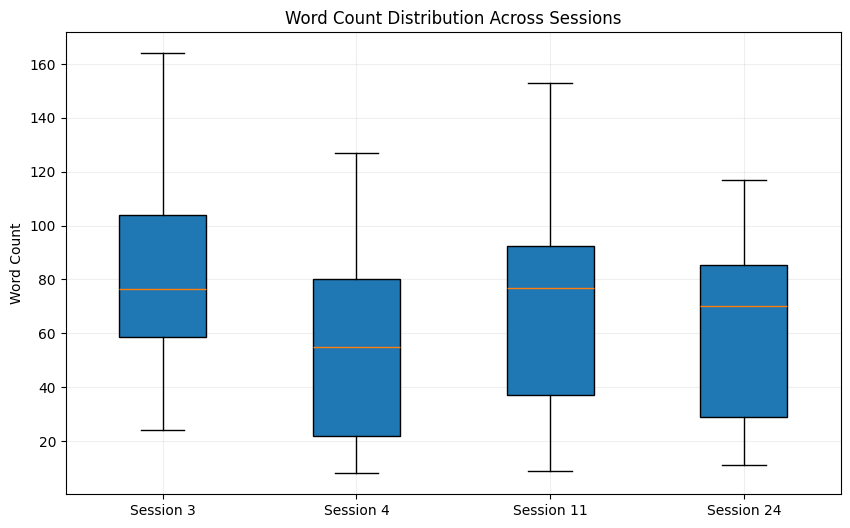

In [50]:
plt.figure(figsize=(10,6))
plt.boxplot(
    [df["word_count"] for df in text_dfs.values()],
    labels=text_dfs.keys(),
    patch_artist=True
)

plt.title("Word Count Distribution Across Sessions")
plt.ylabel("Word Count")
plt.grid(True, alpha=0.2)
plt.show()


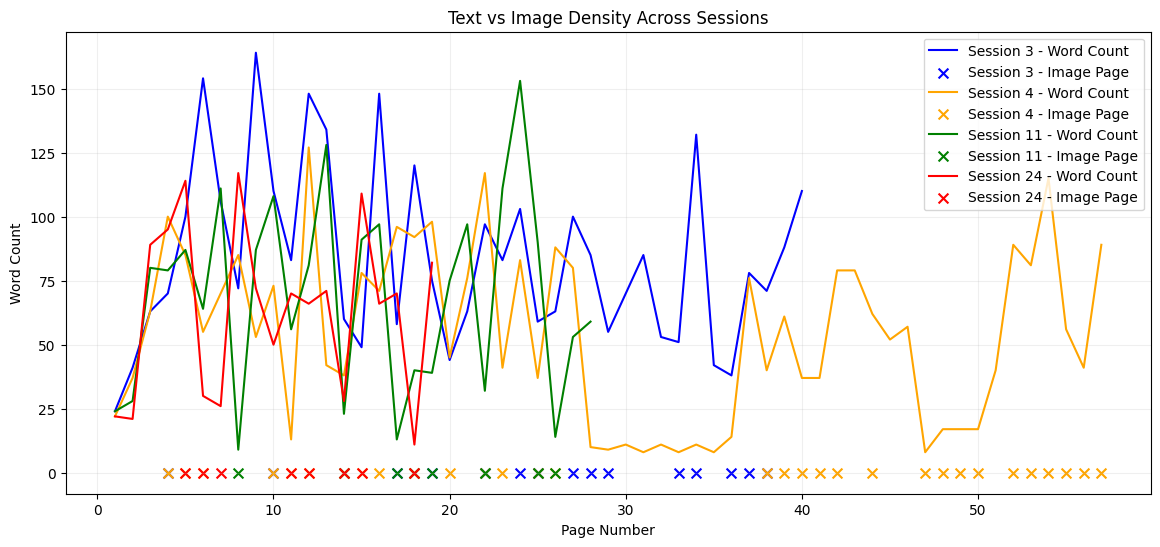

In [52]:
plt.figure(figsize=(14,6))

for session, df in text_dfs.items():
    # Line: word count
    plt.plot(df["page"], df["word_count"], color=colors[session], label=f"{session} - Word Count")

    # Markers: image pages
    img_pages = img_dfs[session][img_dfs[session]["num_images"] > 0]["page"]
    plt.scatter(img_pages, [0]*len(img_pages),  # show image pages along bottom
                color=colors[session], marker="x", s=50, 
                label=f"{session} - Image Page")

plt.title("Text vs Image Density Across Sessions")
plt.xlabel("Page Number")
plt.ylabel("Word Count")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()
